# Comparing Race Plan vs Actual

Very recently I started printing a race plan and using it for Group Rides on Zwift. On my simple / dumb trainer (which doesn't change according to in-app gradients), I get caught by surprise and constantly lose my pack when the gradient changes. Also, I wasn't able to pace myself during the race. I would push as hard for as long as I could and then drop many places when I would feel dejected.

I had a great race yesterday. Achieved quite a few peaks -- All Time Power for 10, 60 and 90mins and recorded a new Heart Rate threshold. However, I did feel there were times in the race where I dropped a little too much. I want to analyse those moments and see what I could have done better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [11, 6]

import fitparse

In [2]:
def parseFitFile(file_path):
    
    fitfile = fitparse.FitFile(file_path)
    
    series = []
    
    for record in fitfile.get_messages("record"):

        row = {
            'altitude': np.NAN,
            'cadence': np.NAN,
            'distance': np.NAN,
            'heart_rate': np.NAN,
            'power': np.NAN,
            'speed': np.NAN,
            'timestamp': np.NAN
        }
        for data in record:
            if data.name in ['altitude','cadence','distance','heart_rate','power','speed','timestamp'] and data.value:
                row[data.name] = data.value

        if row['timestamp']:
            series += [row]
            
    df = pd.DataFrame(series)
#     df = df.set_index('timestamp')
    
    return df

### Importing Ride Data

In [3]:
df = parseFitFile("../Downloads/2021-04-20-20-03-42.fit")
df.shape

(6617, 7)

In [4]:
df.head()

,altitude,cadence,distance,heart_rate,power,speed,timestamp
0,5.0,88.0,8.68,111,175.0,8.288,2021-04-20 15:00:20
1,5.0,88.0,17.04,112,171.0,8.419,2021-04-20 15:00:21
2,5.0,88.0,25.79,119,NaN,8.118,2021-04-20 15:00:22
3,5.0,88.0,33.21,120,170.0,7.682,2021-04-20 15:00:23
4,5.0,87.0,41.25,122,163.0,7.842,2021-04-20 15:00:24


<AxesSubplot:xlabel='distance'>

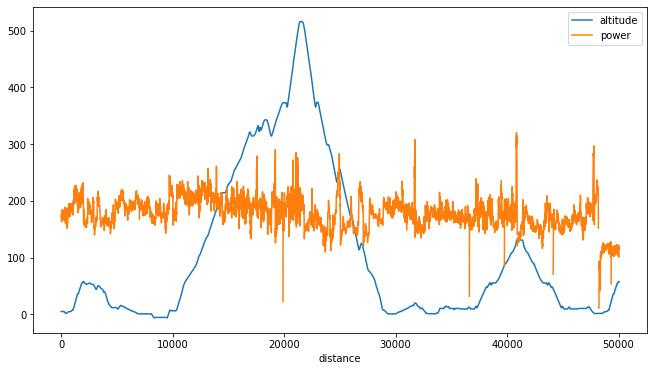

In [5]:
df.plot("distance",["altitude","power"])

I always do a few extra minutes of cool down and then a little extra to ensure I don't leave half way through a kilometer and loose valuable XP points. We know that the race was extactly 48.1km and we can truncate our data to consider only race data.

In [6]:
df = df[df['distance'] <= 48.1*1000]
df.shape

(6108, 7)

In [7]:
race = df[['distance','power','altitude']]
race.loc[:,'distance'] = race['distance'] / 1e3

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<AxesSubplot:xlabel='distance'>

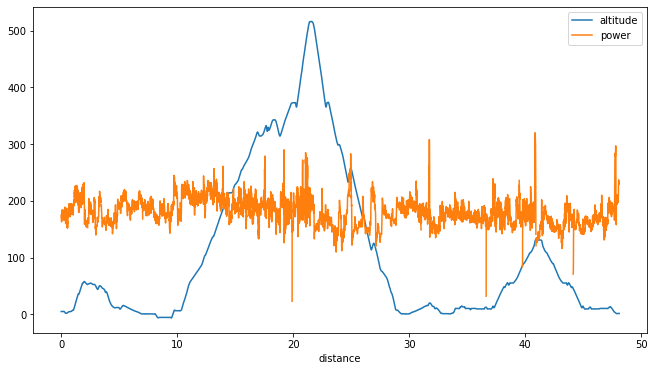

In [8]:
race.plot("distance",["altitude","power"])

### Importing Race Plan

In [9]:
# Copied race plan from Google Sheet document, which in turn was created at BestBikeSplit
plan = """
Interval	Int. Time	Total Time	Int. Dist.	Total Dist.	Grade	Speed	Power
#1	00:01:51	00:01:51	0.93 km	0.93 km	0.0064	30.17 km/h	183 watts
#2	00:01:24	00:03:15	0.38 km	1.31 km	0.0712	16.12 km/h	228 watts
#3	00:01:38	00:04:53	0.51 km	1.82 km	0.0458	18.71 km/h	216 watts
#4	00:00:58	00:05:52	0.52 km	2.34 km	-0.58 %	32.00 km/h	166 watts
#5	00:01:00	00:06:52	0.63 km	2.97 km	-1.68 %	37.77 km/h	154 watts
#6	00:00:38	00:07:31	0.31 km	3.28 km	0.0162	28.88 km/h	195 watts
#7	00:00:57	00:08:28	0.61 km	3.89 km	-2.90 %	38.40 km/h	142 watts
#8	00:00:41	00:09:09	0.49 km	4.38 km	-4.02 %	42.70 km/h	131 watts
#9	00:00:47	00:09:57	0.52 km	4.90 km	-0.54 %	38.99 km/h	167 watts
#10	00:00:35	00:10:32	0.26 km	5.16 km	0.025	27.13 km/h	231 watts
#11	00:05:07	00:15:40	2.92 km	8.08 km	-0.73 %	34.18 km/h	167 watts
#12	00:02:09	00:17:49	1.15 km	9.23 km	-0.04 %	32.05 km/h	175 watts
#13	00:00:41	00:18:30	0.24 km	9.47 km	0.0525	21.29 km/h	220 watts
#14	00:01:07	00:19:38	0.59 km	10.06 km	0.0007	31.09 km/h	176 watts
#15	00:02:13	00:21:52	0.59 km	10.65 km	0.0696	15.95 km/h	227 watts
#16	00:03:17	00:25:10	1.18 km	11.83 km	0.0341	21.43 km/h	208 watts
#17	00:07:45	00:32:55	2.24 km	14.07 km	0.0559	17.30 km/h	222 watts
#18	00:00:43	00:33:39	0.34 km	14.41 km	0.0072	27.80 km/h	184 watts
#19	00:00:59	00:34:38	0.34 km	14.75 km	0.0463	20.78 km/h	216 watts
#20	00:00:21	00:34:59	0.14 km	14.89 km	0.0261	23.27 km/h	232 watts
#21	00:05:17	00:40:16	1.61 km	16.50 km	0.0511	18.24 km/h	219 watts
#22	00:00:51	00:41:07	0.44 km	16.94 km	-0.36 %	31.04 km/h	170 watts
#23	00:01:03	00:42:11	0.36 km	17.30 km	0.0474	20.55 km/h	218 watts
#24	00:01:23	00:43:34	0.62 km	17.92 km	0.0168	26.72 km/h	195 watts
#25	00:00:20	00:43:55	0.17 km	18.09 km	0.0024	30.24 km/h	179 watts
#26	00:00:31	00:44:26	0.43 km	18.52 km	-6.70 %	49.06 km/h	111 watts
#27	00:03:05	00:47:32	0.94 km	19.46 km	0.0591	18.29 km/h	224 watts
#28	00:00:48	00:48:20	0.37 km	19.83 km	0.0088	27.35 km/h	186 watts
#29	00:06:52	00:55:12	1.15 km	20.98 km	0.1186	10.09 km/h	235 watts
#30	00:00:35	00:55:48	0.18 km	21.16 km	0.0373	18.42 km/h	211 watts
#31	00:00:23	00:56:11	0.20 km	21.36 km	-1.12 %	29.79 km/h	160 watts
#32	00:01:08	00:57:20	1.08 km	22.44 km	-13.38 %	56.87 km/h	0 watts
#33	00:00:12	00:57:32	0.16 km	22.60 km	0.0372	47.91 km/h	211 watts
#34	00:00:56	00:58:28	0.77 km	23.37 km	-8.59 %	49.58 km/h	30 watts
#35	00:00:40	00:59:08	0.47 km	23.84 km	-4.61 %	42.36 km/h	127 watts
#36	00:00:36	00:59:45	0.49 km	24.33 km	-10.22 %	48.16 km/h	0 watts
#37	00:01:12	01:00:57	0.30 km	24.63 km	0.07	14.74 km/h	226 watts
#38	00:00:36	01:01:34	0.40 km	25.03 km	-8.87 %	39.96 km/h	0 watts
#39	00:01:18	01:02:52	1.28 km	26.31 km	-8.12 %	58.93 km/h	105 watts
#40	00:00:26	01:03:19	0.31 km	26.62 km	0.0233	41.17 km/h	227 watts
#41	00:00:13	01:03:32	0.11 km	26.73 km	-7.84 %	29.19 km/h	114 watts
#42	00:00:29	01:04:02	0.37 km	27.10 km	-8.95 %	44.54 km/h	4 watts
#43	00:00:52	01:04:55	0.63 km	27.73 km	-3.18 %	43.54 km/h	142 watts
#44	00:00:44	01:05:39	0.71 km	28.44 km	-7.49 %	57.05 km/h	106 watts
#45	00:01:46	01:07:26	1.14 km	29.58 km	-0.67 %	38.28 km/h	169 watts
#46	00:03:07	01:10:34	1.58 km	31.16 km	0.0094	30.32 km/h	186 watts
#47	00:00:23	01:10:57	0.18 km	31.34 km	0.0229	28.60 km/h	216 watts
#48	00:02:02	01:12:59	1.25 km	32.59 km	-1.57 %	36.86 km/h	156 watts
#49	00:01:19	01:14:19	0.74 km	33.33 km	0.003	33.33 km/h	180 watts
#50	00:01:36	01:15:55	0.74 km	34.07 km	0.0148	27.76 km/h	193 watts
#51	00:04:38	01:20:33	2.56 km	36.63 km	-0.17 %	33.11 km/h	174 watts
#52	00:00:31	01:21:05	0.26 km	36.89 km	0.0098	29.94 km/h	186 watts
#53	00:02:31	01:23:37	0.83 km	37.72 km	0.0439	19.70 km/h	216 watts
#54	00:02:17	01:25:54	1.08 km	38.80 km	0.0128	28.28 km/h	191 watts
#55	00:05:08	01:31:03	1.67 km	40.47 km	0.042	19.48 km/h	214 watts
#56	00:02:52	01:33:55	2.13 km	42.60 km	-3.35 %	44.47 km/h	135 watts
#57	00:01:46	01:35:42	1.02 km	43.62 km	-1.20 %	34.18 km/h	161 watts
#58	00:00:57	01:36:39	0.70 km	44.32 km	-4.46 %	44.42 km/h	125 watts
#59	00:04:38	01:41:18	2.58 km	46.90 km	-0.14 %	33.27 km/h	176 watts
#60	00:01:21	01:42:40	0.85 km	47.75 km	-1.38 %	37.52 km/h	160 watts
"""

In [10]:
from io import StringIO

plan = pd.read_table(StringIO(plan))
plan.shape

(60, 8)

In [11]:
plan.head()

,Interval,Int. Time,Total Time,Int. Dist.,Total Dist.,Grade,Speed,Power
0,#1,00:01:51,00:01:51,0.93 km,0.93 km,0.0064,30.17 km/h,183 watts
1,#2,00:01:24,00:03:15,0.38 km,1.31 km,0.0712,16.12 km/h,228 watts
2,#3,00:01:38,00:04:53,0.51 km,1.82 km,0.0458,18.71 km/h,216 watts
3,#4,00:00:58,00:05:52,0.52 km,2.34 km,-0.58 %,32.00 km/h,166 watts
4,#5,00:01:00,00:06:52,0.63 km,2.97 km,-1.68 %,37.77 km/h,154 watts


In [12]:
plan.loc[:,"total_distance"] = plan["Total Dist."].apply(lambda x: float(x.replace(" km","")))
plan.loc[:,"interval_distance"] = plan["Int. Dist."].apply(lambda x: float(x.replace(" km","")))
plan.loc[:,"power"] = plan["Power"].apply(lambda x: int(x.replace(" watts","")))
plan.loc[:,"grade"] = plan["Grade"].apply(lambda x: float(x.replace(" %","")))

In [13]:
final_plan = plan[["total_distance","interval_distance","power","grade"]]

In [14]:
final_plan.head()

,total_distance,interval_distance,power,grade
0,0.93,0.93,183,0.0064
1,1.31,0.38,228,0.0712
2,1.82,0.51,216,0.0458
3,2.34,0.52,166,-0.5800
4,2.97,0.63,154,-1.6800


In [15]:
final_plan['total_distance'].max()

47.75

In [16]:
plan[plan.index == 59]

,Interval,Int. Time,Total Time,Int. Dist.,Total Dist.,Grade,Speed,Power,total_distance,interval_distance,power,grade
59,#60,00:01:21,01:42:40,0.85 km,47.75 km,-1.38 %,37.52 km/h,160 watts,47.75,0.85,160,-1.38


In [17]:
47.75 + 0.5

48.25

<AxesSubplot:xlabel='total_distance'>

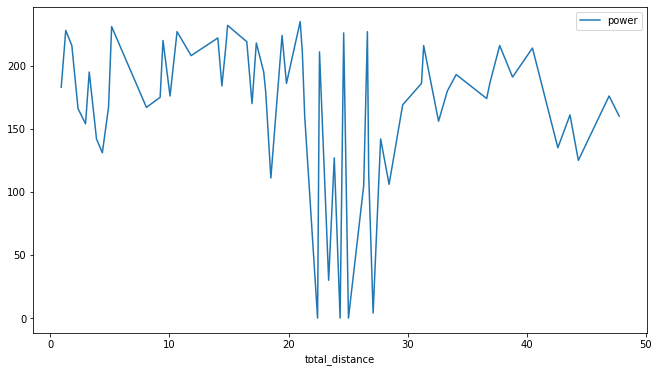

In [18]:
final_plan.plot("total_distance","power")

### Analysis

The plan data calculates an average power for the interval. We need to convert the race data into these intervals as well and compare.

There is a slight mismatch between the two sources of data. We will try and align them from the end.

In [19]:
m1 = max(race['distance'])
m2 = max(final_plan['total_distance'])
diff = max(race['distance']) - max(final_plan['total_distance'])
m1,m2,diff

(48.08967, 47.75, 0.33966999999999814)

In [20]:
race_aligned = race
race_aligned.loc[:,'distance'] = race_aligned['distance'] - diff
race_aligned = race_aligned[race_aligned['distance']>=0]
race_aligned.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,distance,power,altitude
36,0.01089,186.0,2.6
37,0.02289,165.0,2.4
38,0.03598,176.0,2.2
39,0.04811,160.0,2.0
40,0.06104,163.0,1.8


Now we calculate the average power in the race using the intervals defined in the plan.

In [21]:
rows = []
for i,row in final_plan.iterrows():
    end = row['total_distance']
    start = end - row['interval_distance']
    avg_power = np.average(race.loc[(race['distance'] >= start) & (race['distance'] < end),'power'].dropna())
    rows.append([start,end,avg_power])
    
race_intervals = pd.DataFrame(rows,columns=['start','end','power'])
race_intervals.head()

,start,end,power
0,0.00,0.93,191.018519
1,0.93,1.31,206.139535
2,1.31,1.82,200.662921
3,1.82,2.34,177.521739
4,2.34,2.97,175.019231


In [22]:
final_plan.loc[:,'start'] = final_plan['total_distance'] - final_plan['interval_distance']
final_plan.loc[:,'end'] = final_plan['total_distance']

final = final_plan[['start','end','power']]
final.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,start,end,power
0,0.00,0.93,183
1,0.93,1.31,228
2,1.31,1.82,216
3,1.82,2.34,166
4,2.34,2.97,154


We merge the data between plan vs actual using the interval information -- start and end.

In [23]:
result = race_intervals.merge(final,on=['start','end'],suffixes=['_actual','_plan'])
# result.head()
race_intervals.shape, final.shape, result.shape

((60, 3), (60, 3), (60, 4))

In [24]:
result.loc[:,'diff'] = result['power_actual'] - result['power_plan']
result.loc[:,'interval'] = result['end'] - result['start']
result.head()

,start,end,power_actual,power_plan,diff,interval
0,0.00,0.93,191.018519,183,8.018519,0.93
1,0.93,1.31,206.139535,228,-21.860465,0.38
2,1.31,1.82,200.662921,216,-15.337079,0.51
3,1.82,2.34,177.521739,166,11.521739,0.52
4,2.34,2.97,175.019231,154,21.019231,0.63


Now we plot this data to see it visually. We use the altitude data from the race to give context. We define the width of the bars based on the interval duration.

There is still an alignment issue between race and plan. But this will give us some context. Below we have printed the raw data as well.

In conclusion:
* I was way faster downhill when the plan recommend resting and virtually stop pedalling. I didn't want my average watts for the race to come down.
* Uphill I was off by 10-30 watts. In some case 40 watts but I think that's exaggerated by the misalignment. I need to change gears or really focus to reduce this gap.
* In the flat sections 30-37km and 44+km, I could have been faster. I wasn't able to pull through. 

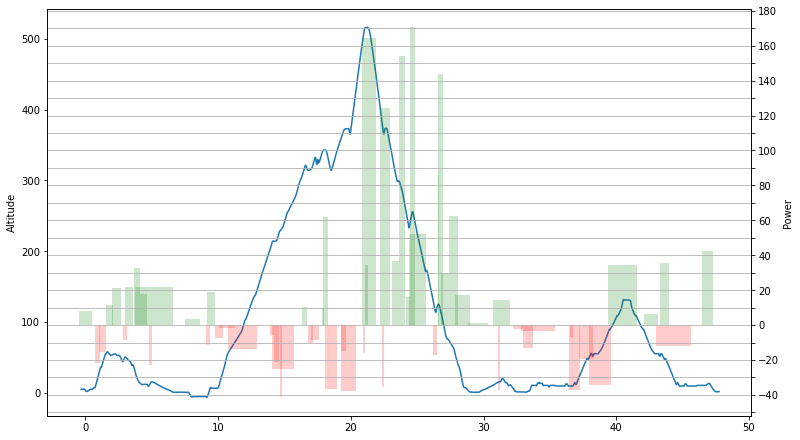

In [25]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(race['distance'],race['altitude'],label='Altitute')
ax2 = ax1.twinx()
ax2.bar(result['start'], result['diff']
            ,color=(result['diff'] > 0).map({True: 'g',False: 'r'}),alpha=0.2
            ,width=result['interval']
            ,label='Diff in Power'
           )
ax1.set_ylabel('Altitude')
ax2.set_ylabel('Power')

# Add more ticks to analyse
tick_spacing = 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
for i, tick in enumerate(ax2.yaxis.get_ticklabels()):
    if i%2:
        tick.set_visible(False)
ax2.grid()
plt.show()

In [26]:
result

,start,end,power_actual,power_plan,diff,interval
0,0.00,0.93,191.018519,183,8.018519,0.93
1,0.93,1.31,206.139535,228,-21.860465,0.38
2,1.31,1.82,200.662921,216,-15.337079,0.51
3,1.82,2.34,177.521739,166,11.521739,0.52
4,2.34,2.97,175.019231,154,21.019231,0.63
5,2.97,3.28,186.615385,195,-8.384615,0.31
6,3.28,3.89,163.975000,142,21.975000,0.61
7,3.89,4.38,163.633333,131,32.633333,0.49
8,4.38,4.90,185.023256,167,18.023256,0.52
9,4.90,5.16,207.888889,231,-23.111111,0.26


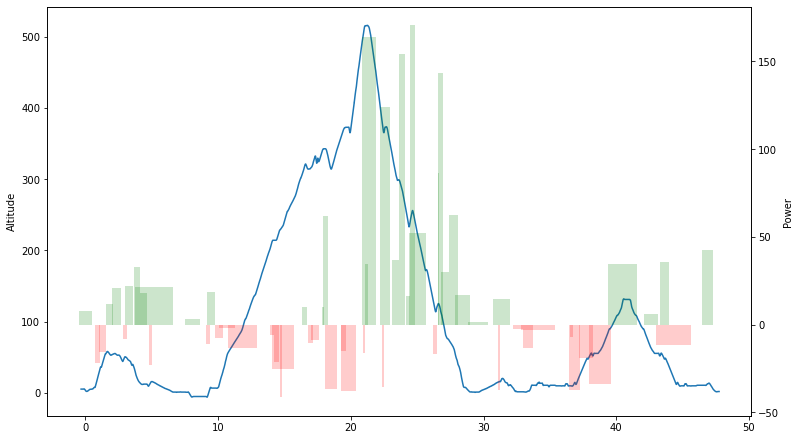

In [27]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(race['distance'],race['altitude'],label='Altitute')
ax2 = ax1.twinx()
ax2.bar(result['start'], result['diff']
            ,color=(result['diff'] > 0).map({True: 'g',False: 'r'}),alpha=0.2
            ,width=result['interval']
            ,label='Diff in Power'
           )
ax1.set_ylabel('Altitude')
ax2.set_ylabel('Power')

plt.show()